In [84]:
import pandas as pd
ds = pd.read_csv(r"D:\Datasets\CSV files\supermarket_sales.csv")
print('Sample data=\n', ds.head())


Sample data=
     Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%  Total Sales  \
0       Health and beauty       74.69         7  26.1415     548.9715   
1  Electronic accessories       15.28         5   3.8200      80.2200   
2      Home and lifestyle       46.33         7  16.2155     340.5255   
3       Health and beauty       58.22         8  23.2880     489.0480   
4       Sports and travel       86.31         7  30.2085     634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01-05-2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total Sales              1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
print("\nColumns in dataset:\n", ds.columns.tolist(), "\n")


Columns in dataset:
 ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] 



In [10]:
print('Missing values : \n', ds.isnull().sum(), '\n')

Missing values : 
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total Sales                0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64 



In [11]:
print('Duplicate values : \n', ds.duplicated().sum(), '\n')

Duplicate values : 
 0 



Numerical Columns: 
 Index(['Unit price', 'Quantity', 'Tax 5%', 'Total Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object') 



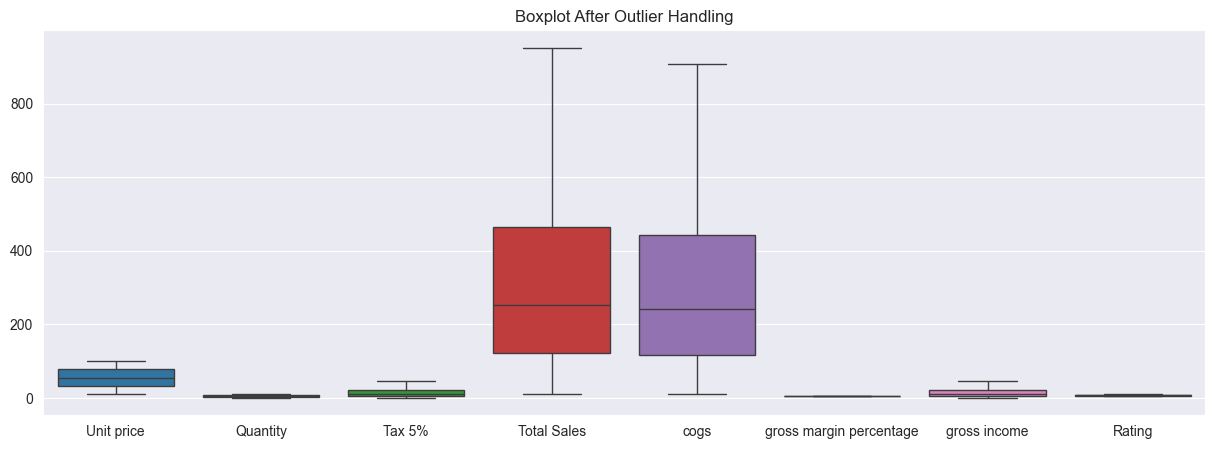

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_col = ds.select_dtypes(include=[np.number]).columns
print('Numerical Columns: \n', numerical_col, '\n')

for col in numerical_col:
    q1 = ds[col].quantile(0.25)
    q3 = ds[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    ds = ds[(ds[col] >= lower) & (ds[col] <= upper)]

plt.figure(figsize=(15, 5))
sns.boxplot(data=ds[numerical_col])
plt.title("Boxplot After Outlier Handling")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ds.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", cat_cols.tolist())

le = LabelEncoder()
for col in cat_cols:
    ds[col] = le.fit_transform(ds[col])

print("\nEncoded Dataset Sample:\n", ds.head())

Categorical Columns:
 ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']

Encoded Dataset Sample:
    Invoice ID  Branch  City  Customer type  Gender  Product line  Unit price  \
0         807       0     2              0       0             3       74.69   
1         142       2     1              1       0             0       15.28   
2         648       0     2              1       1             4       46.33   
3          18       0     2              0       1             3       58.22   
4         335       0     2              1       1             5       86.31   

   Quantity   Tax 5%  Total Sales  Date  Time  Payment    cogs  \
0         7  26.1415     548.9715     4   146        2  522.83   
1         5   3.8200      80.2200    31    23        0   76.40   
2         7  16.2155     340.5255    26   155        1  324.31   
3         8  23.2880     489.0480    50   483        2  465.76   
4         7  30.2085     634.3785    1

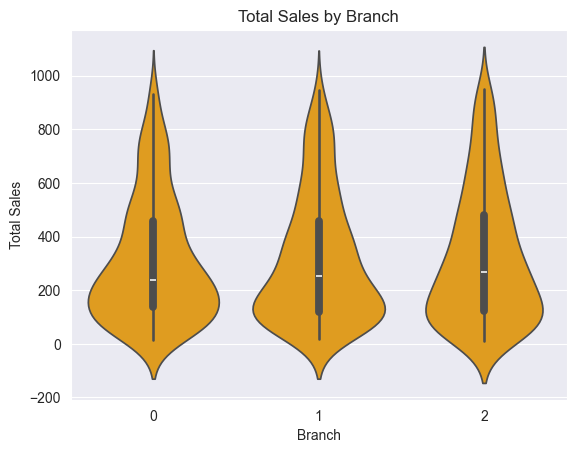

In [59]:
sns.violinplot(x='Branch', y='Total Sales', data=ds, color='orange')
plt.title('Total Sales by Branch')
plt.show()

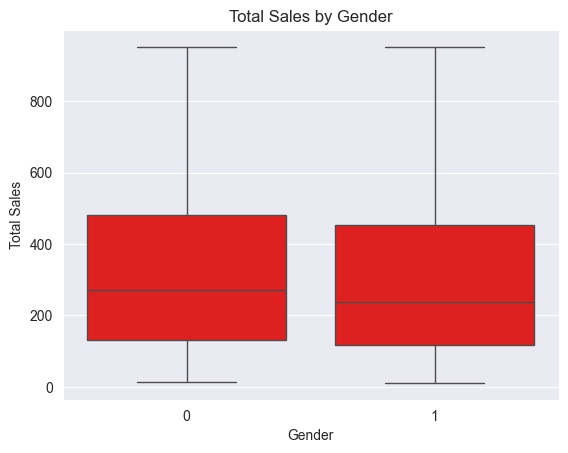

In [60]:
sns.boxplot(x='Gender', y='Total Sales', data=ds, color='red')
plt.title('Total Sales by Gender')
plt.show()

Text(0.5, 1.0, 'Payment Method Distribution')

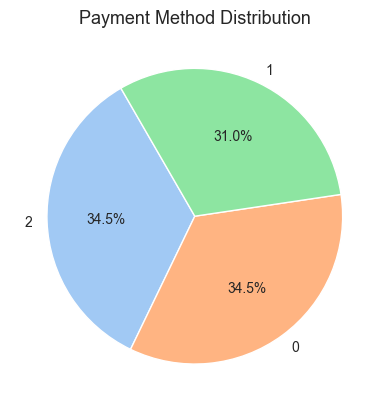

In [24]:
payment_counts = ds['Payment'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution', fontsize=13)

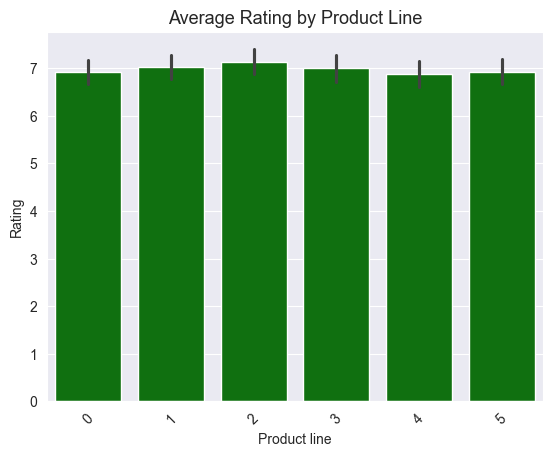

In [61]:
sns.barplot(x='Product line', y='Rating', data=ds, color='Green')
plt.title('Average Rating by Product Line', fontsize=13)
plt.xticks(rotation=45)
plt.show()


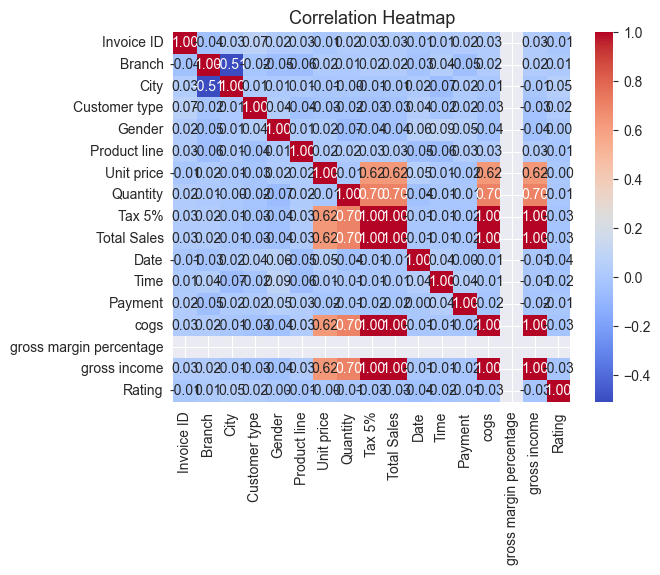

In [38]:
corr = ds.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=13)
plt.show()

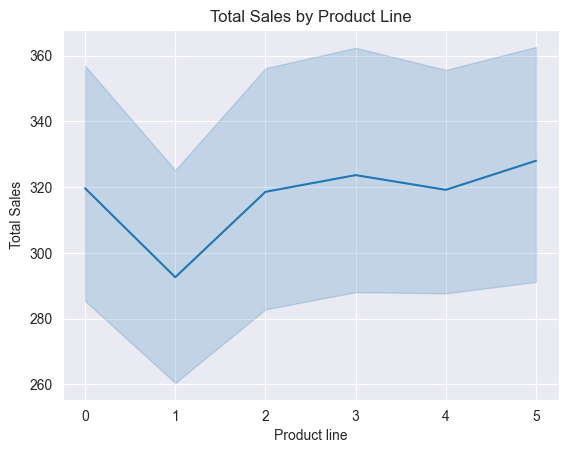

In [66]:
sns.lineplot(x='Product line', y='Total Sales', data=ds)
plt.title('Total Sales by Product Line')
plt.show()

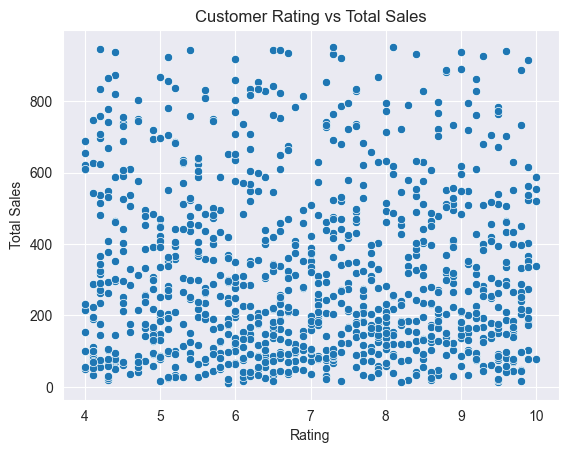

In [35]:
sns.scatterplot(x='Rating', y='Total Sales', data=ds)
plt.title('Customer Rating vs Total Sales')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

X = ds.drop(columns=['Total Sales'])
y = ds['Total Sales']

print(" Input Features Shape:", X.shape)
print(" Target Variable Shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,)

print("\n Data Split Summary:")
print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print("Training Target:", y_train.shape)
print("Testing Target:", y_test.shape)

 Input Features Shape: (991, 16)
 Target Variable Shape: (991,)

 Data Split Summary:
Training Features: (792, 16)
Testing Features: (199, 16)
Training Target: (792,)
Testing Target: (199,)


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

lin_reg=LinearRegression()
ran_for=RandomForestRegressor(random_state=42)

lin_reg.fit(X_train,y_train)
ran_for.fit(X_train,y_train)

pred_lin=lin_reg.predict(X_test)
pred_ran=ran_for.predict(X_test)

def metrics(model,y_true,y_pred):
    print(f'\n ----{model}----')
    print('MSE:',mean_squared_error(y_true,y_pred))
    print('MAE:',mean_absolute_error(y_true,y_pred))
    print('r2_Score:',r2_score(y_true,y_pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_true,y_pred)))

metrics('Linear Regression',y_test,pred_lin)
metrics('Random Forest',y_test,pred_ran)


 ----Linear Regression----
MSE: 1.776549642859055e-26
MAE: 1.0622435371287929e-13
r2_Score: 1.0
RMSE: 1.3328727031712575e-13

 ----Random Forest----
MSE: 3.491868177862676
MAE: 0.8950595728643169
r2_Score: 0.9999458182076998
RMSE: 1.8686541086735864


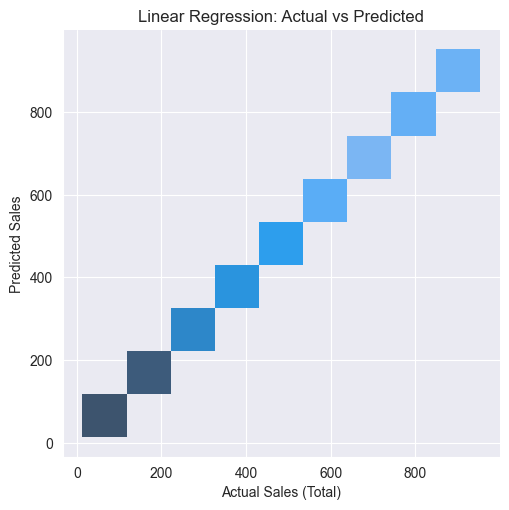

In [83]:
sns.displot(x=y_test, y=pred_lin)
plt.xlabel("Actual Sales (Total)")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

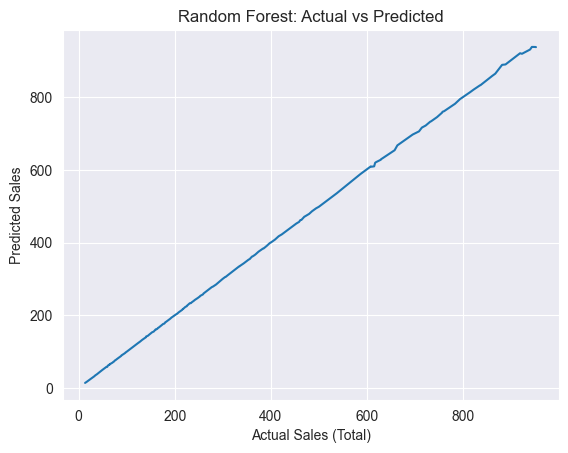

In [73]:
sns.lineplot(x=y_test, y=pred_ran)
plt.xlabel("Actual Sales (Total)")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.show()